In [20]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('df_concatenated_station_v3.csv') #import later
def get_top_50(grp):
    return grp.sort_values("IMPRESSIONS", ascending = False).head(50)




In [21]:
top50 = df.groupby('DAY')[["IMPRESSIONS", "STATION"]].apply(get_top_50).reset_index()


In [22]:
total_traffic = top50.groupby(['DAY'])['IMPRESSIONS'].sum().reset_index()


In [23]:
top50 = top50.merge(total_traffic, on = 'DAY', suffixes = ['_station', '_total'])


In [24]:
top50['density_score'] = top50['IMPRESSIONS_station'] / top50['IMPRESSIONS_total']


In [25]:
top50['slots'] = top50['density_score'].map(lambda val: round(val * 150))


In [26]:
total_slots = top50.groupby(['DAY'])[['density_score', 'slots']].sum().reset_index()


In [27]:
top50.groupby('DAY')['slots'].sum()

DAY
10    153.0
11    153.0
12    147.0
13    150.0
14    150.0
15    149.0
16    150.0
Name: slots, dtype: float64

In [28]:
top50[top50.DAY==12]


,DAY,level_1,IMPRESSIONS_station,STATION,IMPRESSIONS_total,density_score,slots
100,12,429,308789.0,34 ST-PENN STA,5059993.0,0.061026,9.0
101,12,1612,277455.0,GRD CNTRL-42 ST,5059993.0,0.054833,8.0
102,12,415,215529.0,34 ST-HERALD SQ,5059993.0,0.042595,6.0
103,12,324,209552.0,23 ST,5059993.0,0.041413,6.0
104,12,100,186565.0,14 ST-UNION SQ,5059993.0,0.036871,6.0
105,12,2437,182168.0,TIMES SQ-42 ST,5059993.0,0.036002,5.0
106,12,765,181054.0,86 ST,5059993.0,0.035781,5.0
107,12,1563,177910.0,FULTON ST,5059993.0,0.035160,5.0
108,12,478,157937.0,42 ST-PORT AUTH,5059993.0,0.031213,5.0
109,12,597,137307.0,59 ST,5059993.0,0.027136,4.0


In [29]:
top50.slots.loc[134]=2
top50.slots.loc[133]=3
top50.slots.loc[135]=3
top50.slots.loc[285]=3
top50.slots.loc[35]=1
top50.slots.loc[36]=1
top50.slots.loc[37]=1
top50.slots.loc[80]=1
top50.slots.loc[81]=1
top50.slots.loc[82]=1



In [30]:
def duplicate_rows(df, countcol):
    for _, row in df.iterrows():
        for i in range(int(row[countcol])-1):
            # Append this row at the end of the DataFrame
            df = pd.concat(row)
        return df


In [31]:
performers = pd.read_csv('performer_dataset.csv')
performers.head()
performers = performers.sort_values(by='Performance_code')



In [32]:
from collections import defaultdict
def firstRound(day):
    filt = top50[['STATION','slots']][top50.DAY==day]
#     filt.set_index(['STATION','slots'])
    d= {k:v for k,v in zip(filt.STATION, filt.slots)}
    samplelist = [np.random.choice(performers.Performer_ID, replace=False) for p in performers.Performer_ID]
    newDict = defaultdict(list)
    for k,v in d.items():
        v=int(v)
        newValue = samplelist[:v]
        newDict[k]=newValue
        del samplelist[:v]
    return newDict
    


In [33]:
def make_frame(day):
    
    f = pd.DataFrame.from_dict(firstRound(day), orient = 'index').stack()
    frame =pd.DataFrame(f)
#     slots = top50[['STATION','slots']][top50.DAY==day].copy(deep=True)
#     slots = slots.reset_index('STATION', inplace = True)
    frame.reset_index(1,drop=2,inplace=True)
    
    
    merger = top50[['STATION','IMPRESSIONS_station','slots']][top50.DAY==day].copy(deep=True)
    merger.set_index('STATION', inplace=True)
    frame = frame.merge(merger,left_index=True,right_index=True)
    frame.reset_index(drop=True,inplace=True)
    
    frame.columns = ['Performer_ID','IMPRESSIONS_station','slots']
    frame['perf_imp'] = frame.IMPRESSIONS_station / frame.slots
    return frame
make_frame(11)

,Performer_ID,IMPRESSIONS_station,slots,perf_imp
0,98.0,32321.0,1.0,32321.000000
1,70.0,33403.0,2.0,16701.500000
2,22.0,33403.0,2.0,16701.500000
3,119.0,82391.0,5.0,16478.200000
4,141.0,82391.0,5.0,16478.200000
5,110.0,82391.0,5.0,16478.200000
6,4.0,82391.0,5.0,16478.200000
7,98.0,82391.0,5.0,16478.200000
8,25.0,64430.0,4.0,16107.500000
9,74.0,64430.0,4.0,16107.500000


In [34]:
def run_1Week():
    df10 = make_frame(10)
    df11 = make_frame(11)
    df12 = make_frame(12)
    df13 = make_frame(13)
    df14 = make_frame(14)
    df15 = make_frame(15)
    df16 = make_frame(16)
    allTogether = pd.concat([df11,df12,df13,df14,df15,df16],axis =0)
    allTogether = allTogether.groupby('Performer_ID')['perf_imp'].sum().reset_index()
#     allTogether.set_index('Performer_ID',inplace = True)
    return allTogether

def run_1Month():                            
    week1 = run_1Week()
    week2 = run_1Week()
    week3 = run_1Week()
    week4 = run_1Week()
    together = pd.concat([week1,week2,week3,week4],axis=0)
    together = together.groupby('Performer_ID')['perf_imp'].sum().reset_index()
    
    return together


def run_1Year():                            
    month1=run_1Month()
    month2=run_1Month()
    month3=run_1Month()
    month4=run_1Month()
    month5=run_1Month()
    month6=run_1Month()
    month7=run_1Month()
    month8=run_1Month()
    month9=run_1Month()
    month10=run_1Month()
    month11=run_1Month()
    month12=run_1Month()
    together = pd.concat([month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12],axis=0)
    together = together.groupby('Performer_ID')['perf_imp'].sum().reset_index()
    return together


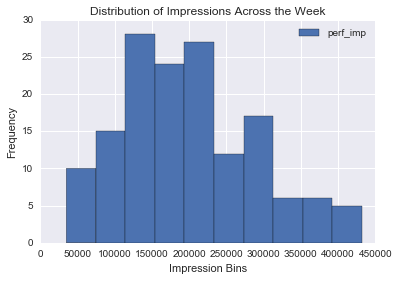

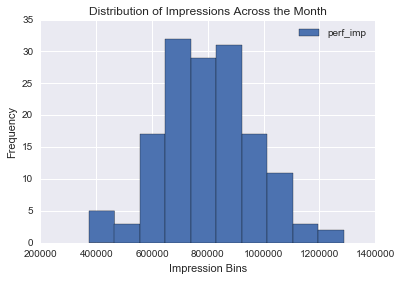

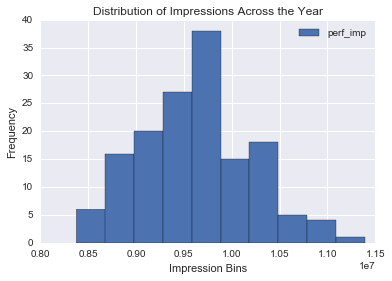

In [38]:

week = run_1Week()
week.plot.hist(x='Performer_ID')
plt.xlabel("Impression Bins")
plt.title("Distribution of Impressions Across the Week")

month = run_1Month()
month.plot.hist(x='Performer_ID')
plt.xlabel("Impression Bins")
plt.title("Distribution of Impressions Across the Month")

year = run_1Year()
year.plot.hist(x='Performer_ID')
plt.xlabel("Impression Bins")
plt.title("Distribution of Impressions Across the Year")